# Jonathan's Project Notes


## Bollinger Bands

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import numpy as np


In [2]:
# Load env data
load_dotenv()


True

In [3]:
# Assign Alpaca keys to variables
alpaca_api_key = os.getenv("APCA_API_KEY_ID")
alpaca_secret_key = os.getenv("APCA_API_SECRET_KEY")


In [4]:
# Initialize Alpaca connection
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)


In [5]:
# Set start and end dates for
start_date = pd.Timestamp('2020-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-12-31', tz='America/New_York').isoformat()


In [6]:
# Assign default ticker symbol
ticker_string = 'JPM'
ticker = [ticker_string]


In [7]:
# Assign default time frame
timeframe = '1D'


In [8]:
# Get ticker historical data
df_ohlc_original = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df


In [9]:
# Copy of original data
df_ohlc = df_ohlc_original

# Verify data in dataframe
df_ohlc = df_ohlc[ticker_string]
df_ohlc.head()


,open,high,low,close,volume
time,,,,,
2020-01-02 00:00:00-05:00,139.79,141.10,139.265,141.09,8484783
2020-01-03 00:00:00-05:00,137.50,139.23,137.080,138.28,8191470
2020-01-06 00:00:00-05:00,136.56,138.27,136.500,138.21,6884814
2020-01-07 00:00:00-05:00,137.28,137.86,135.820,135.87,8925842
2020-01-08 00:00:00-05:00,135.78,137.58,135.600,136.97,7572412


In [10]:
# Window size
bollinger_band_window = 20
num_standard_deviation = 2

# Calculate mean and standard deviation
df_ohlc['bollinger_band_middle'] = df_ohlc['close'].rolling(window=bollinger_band_window).mean()
df_ohlc['bollinger_band_std'] = df_ohlc['close'].rolling(window=bollinger_band_window).std()

# Calculate upper bollinger band and lower bollinger band
df_ohlc['bollinger_band_upper'] = df_ohlc['bollinger_band_middle'] + (df_ohlc['bollinger_band_std'] * num_standard_deviation)
df_ohlc['bollinger_band_lower'] = df_ohlc['bollinger_band_middle'] - (df_ohlc['bollinger_band_std'] * num_standard_deviation)

df_ohlc.head()


,open,high,low,close,volume,bollinger_band_middle,bollinger_band_std,bollinger_band_upper,bollinger_band_lower
time,,,,,,,,,
2020-01-02 00:00:00-05:00,139.79,141.10,139.265,141.09,8484783,NaN,NaN,NaN,NaN
2020-01-03 00:00:00-05:00,137.50,139.23,137.080,138.28,8191470,NaN,NaN,NaN,NaN
2020-01-06 00:00:00-05:00,136.56,138.27,136.500,138.21,6884814,NaN,NaN,NaN,NaN
2020-01-07 00:00:00-05:00,137.28,137.86,135.820,135.87,8925842,NaN,NaN,NaN,NaN
2020-01-08 00:00:00-05:00,135.78,137.58,135.600,136.97,7572412,NaN,NaN,NaN,NaN


In [11]:
# Create signal for long
df_ohlc['bollinger_band_long'] = np.where(df_ohlc['close'] > df_ohlc['bollinger_band_upper'], 1.0, 0.0)
df_ohlc.loc[df_ohlc['bollinger_band_long'] == 1.0].head()


,open,high,low,close,volume,bollinger_band_middle,bollinger_band_std,bollinger_band_upper,bollinger_band_lower,bollinger_band_long
time,,,,,,,,,,
2020-05-27 00:00:00-04:00,102.07,102.58,98.80,101.34,70053978,91.32150,4.099628,99.520756,83.122244,1.0
2020-06-03 00:00:00-04:00,101.58,104.92,101.06,104.29,46984922,92.73225,5.632350,103.996950,81.467550,1.0
2020-06-04 00:00:00-04:00,103.82,106.61,102.79,106.48,49603094,93.54225,6.376804,106.295859,80.788641,1.0
2020-06-05 00:00:00-04:00,114.93,115.77,109.53,111.30,78479574,94.54725,7.477194,109.501637,79.592863,1.0
2020-06-08 00:00:00-04:00,113.41,114.19,111.94,113.40,40559200,95.59275,8.558137,112.709025,78.476475,1.0


In [12]:
df_ohlc.dropna(inplace=True)
df_ohlc.isna().sum()


open                     0
high                     0
low                      0
close                    0
volume                   0
bollinger_band_middle    0
bollinger_band_std       0
bollinger_band_upper     0
bollinger_band_lower     0
bollinger_band_long      0
dtype: int64

<AxesSubplot:title={'center':'JPM Bollinger Bands'}, xlabel='Date and Time', ylabel='Price (US Dollars)'>

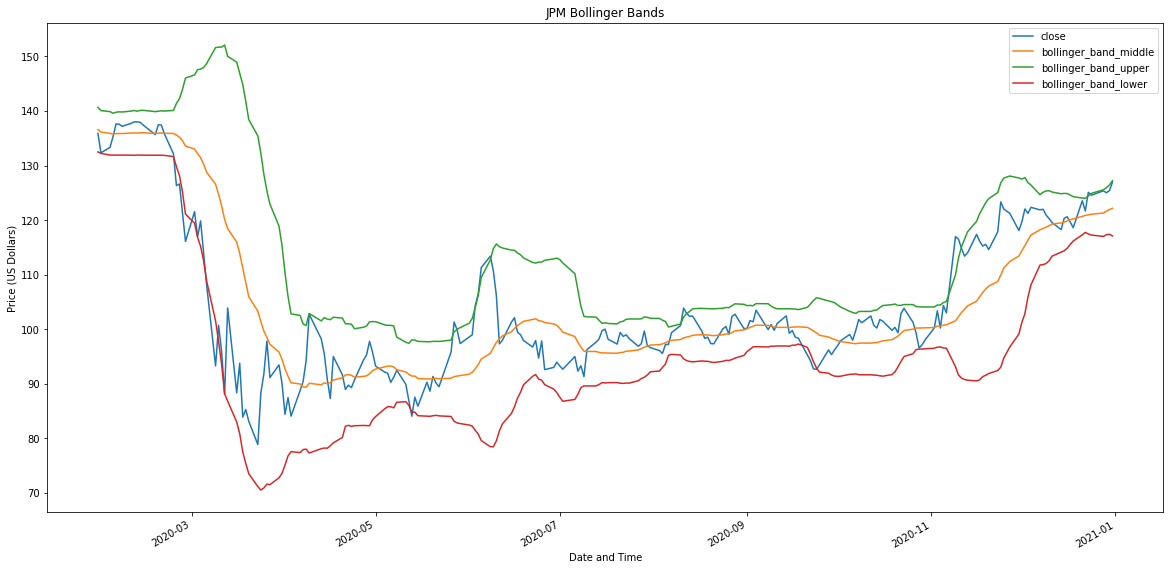

In [13]:
# Plot Bollinger Bands with closing prices to visually see data
df_ohlc[['close', 'bollinger_band_middle', 'bollinger_band_upper', 'bollinger_band_lower']].plot(figsize=(20,10), title='JPM Bollinger Bands', xlabel='Date and Time', ylabel='Price (US Dollars)')


In [14]:
# Bollinger Band function to capture signal
def bollinger_band_signal_generator(dataframe_name, closing_cost_column_name = 'close', bollinger_band_window = 20, num_standard_deviation = 2):

    # Calculate mean and standard deviation
    dataframe_name['bollinger_band_middle'] = dataframe_name[closing_cost_column_name].rolling(window=bollinger_band_window).mean()
    dataframe_name['bollinger_band_std'] = dataframe_name[closing_cost_column_name].rolling(window=bollinger_band_window).std()

    # Calculate upper bollinger band and lower bollinger band
    dataframe_name['bollinger_band_upper'] = dataframe_name['bollinger_band_middle'] + (dataframe_name['bollinger_band_std'] * num_standard_deviation)
    dataframe_name['bollinger_band_lower'] = dataframe_name['bollinger_band_middle'] - (dataframe_name['bollinger_band_std'] * num_standard_deviation)

    dataframe_name['bollinger_band_target'] = np.where(dataframe_name[closing_cost_column_name] > dataframe_name['bollinger_band_upper'], 1.0, 0.0)
    
    # Return dataframe with features and target
    return dataframe_name


In [19]:
# Test bollinger band function
testing_df = df_ohlc_original['JPM']
new_boll_df = bollinger_band_signal_generator(testing_df, 'close')
new_boll_df[:50]


,open,high,low,close,volume,bollinger_band_middle,bollinger_band_std,bollinger_band_upper,bollinger_band_lower,bollinger_band_target
time,,,,,,,,,,
2020-01-02 00:00:00-05:00,139.79,141.1000,139.2650,141.0900,8484783,NaN,NaN,NaN,NaN,0.0
2020-01-03 00:00:00-05:00,137.50,139.2300,137.0800,138.2800,8191470,NaN,NaN,NaN,NaN,0.0
2020-01-06 00:00:00-05:00,136.56,138.2700,136.5000,138.2100,6884814,NaN,NaN,NaN,NaN,0.0
2020-01-07 00:00:00-05:00,137.28,137.8600,135.8200,135.8700,8925842,NaN,NaN,NaN,NaN,0.0
2020-01-08 00:00:00-05:00,135.78,137.5800,135.6000,136.9700,7572412,NaN,NaN,NaN,NaN,0.0
2020-01-09 00:00:00-05:00,138.05,138.2300,137.0400,137.4400,7412706,NaN,NaN,NaN,NaN,0.0
2020-01-10 00:00:00-05:00,137.21,137.2500,135.8100,136.0900,8328968,NaN,NaN,NaN,NaN,0.0
2020-01-13 00:00:00-05:00,136.02,137.1900,135.7550,137.1900,8747389,NaN,NaN,NaN,NaN,0.0
2020-01-14 00:00:00-05:00,137.94,140.7600,137.6900,138.7200,20718276,NaN,NaN,NaN,NaN,0.0
